In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
print ("Successfully imported all the necessary packages")
#Pandas is a python package which contains high level data structures and is used in data manipulation and analysis.
#Matplotlib is a plotting library in Python, which produces 2D graphics in different interactive environments.
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

Populating the interactive namespace from numpy and matplotlib
Successfully imported all the necessary packages


In [2]:
#Reading the data
#train data contains the information about day of the week of sale, sales on that day, customers on that day, whether the store was open or not, whether it was a state holiday or a school holiday.
#store_data contains the information about the individual stores, such as what is the assortment, what is the competitor's store distances, since how long the competetors store has been open.

train_data=pd.read_csv("train.csv", low_memory=False)
store_data=pd.read_csv("store.csv")
test_data=pd.read_csv("test.csv")

In [3]:
#preview the data
train_data.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [379]:
store_data.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [380]:
test_data.head(20)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [11]:
#Data preprocessing begins here
#the information about the stores such as holidays, promos, etc and the information about the sales,competetion_distance,store_type etc are available in different datasets, we merge them to make the training data easier to read
print ("Merging the stores and sales data")
combined_train_data=pd.merge(train_data,store_data, on="Store")

Merging the stores and sales data


In [6]:
print ("Previewing the combined data")
combined_train_data.head(400)

Previewing the combined data


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [7]:
#Handling the NaN values
#Checking if there are any NaN rows
combined_train_data.isnull().values.any()

True

In [85]:
#There are some NaN in the data, such as promos, where if promo is not offered by the store, the NaN value is used in its place
#Replacing these NaN values with 0
combined_train_data.fillna(0, inplace=True)

In [9]:
combined_train_data.head(50)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [10]:
#Checking if there are any NaN values
combined_train_data.isnull().values.any()

False

In [11]:
#Reformating the date - from YYYY-MM-DD to DD-MM-YYYY
#First need to change the format of 'Date' Column to datetime
combined_train_data['Date'] = pd.to_datetime(combined_train_data['Date'], errors='coerce')
combined_train_data['Date'] = combined_train_data['Date'].dt.strftime('%d-%m-%Y')

In [12]:
combined_train_data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Store,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DayOfWeek,5,4,3,2,1,7,6,5,4,3,2,1,7,6,5,4,3,2,1,7
Date,31-07-2015,30-07-2015,29-07-2015,28-07-2015,27-07-2015,26-07-2015,25-07-2015,24-07-2015,23-07-2015,22-07-2015,21-07-2015,20-07-2015,19-07-2015,18-07-2015,17-07-2015,16-07-2015,15-07-2015,14-07-2015,13-07-2015,12-07-2015
Sales,5263,5020,4782,5011,6102,0,4364,3706,3769,3464,3558,4395,0,4406,4852,4427,4767,5042,5054,0
Customers,555,546,523,560,612,0,500,459,503,463,469,526,0,512,519,517,550,544,553,0
Open,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0
Promo,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
StateHoliday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SchoolHoliday,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
StoreType,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c


In [13]:
#Creating seperate columns for month and Year to analyze the data better.
combined_train_data['Year'] = pd.DatetimeIndex(combined_train_data['Date']).year
combined_train_data['Month'] = pd.DatetimeIndex(combined_train_data['Date']).month

In [14]:
#preview of the data after reformatting the date
combined_train_data.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,30-07-2015,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,29-07-2015,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,28-07-2015,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,27-07-2015,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
5,1,7,26-07-2015,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
6,1,6,25-07-2015,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
7,1,5,24-07-2015,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
8,1,4,23-07-2015,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
9,1,3,22-07-2015,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [15]:
#Converting 'DayOfWeek' from numerical form to weekday name, so as to make the data easier to understand
combined_train_data['Date'] = pd.to_datetime(combined_train_data['Date'])
combined_train_data['DayOfWeek'] = combined_train_data['Date'].dt.weekday_name

In [16]:
combined_train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,Friday,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,Thursday,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,Wednesday,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,Tuesday,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,Monday,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [17]:
(combined_train_data['CompetitionDistance'] == 0).any()

True

In [18]:
#Some CompetitionDistance values are blank in the Data, We have assumed this to mean that the data of nearest competetor stores couldn't be found, therefore, these values are replaced with Median distance. '
median_cd = combined_train_data['CompetitionDistance'].median(skipna=True)

In [19]:
combined_train_data['CompetitionDistance']=combined_train_data.CompetitionDistance.mask(combined_train_data.CompetitionDistance == 0,median_cd)

In [86]:
# remove all rows(store,date) that are closed as this data doesn't help in predicting the sales on the working days
combined_train_data = combined_train_data[combined_train_data["Open"] != 0]
initial_size= combined_train_data.shape[0]
print(initial_size)

844392


In [3]:
#Performing the same merge operation on test data
combined_test_data=pd.merge(test_data,store_data, on="Store")

In [22]:
#Preview the test data
print ("Previewing the combined test data")
combined_test_data.head()

Previewing the combined test data


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [23]:
#Handling the NaN values, first checking if there are any NaN
combined_test_data.isnull().values.any()

True

In [24]:
#Replacing the NaN values with 0
combined_test_data.fillna(0, inplace=True)

In [25]:
#checking again for NaN

In [26]:
combined_test_data.isnull().values.any()

False

In [4]:
#Reformating the date - from YYYY-MM-DD to DD-MM-YYYY for better readability
#First need to change the format of 'Date' Column to datetime
combined_test_data['Date'] = pd.to_datetime(combined_test_data['Date'], errors='coerce')
combined_test_data['Date'] = combined_test_data['Date'].dt.strftime('%d-%m-%Y')

In [5]:
#Preview the test data
print ("Previewing the combined test data")
combined_test_data.head()

Previewing the combined test data


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,17-09-2015,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,16-09-2015,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,15-09-2015,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,14-09-2015,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,13-09-2015,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [29]:
#Converting 'DayOfWeek' from numerical form to weekday name, so as to make the data easier to understand
combined_test_data['Date'] = pd.to_datetime(combined_test_data['Date'])
combined_test_data['DayOfWeek'] = combined_test_data['Date'].dt.weekday_name

In [8]:
#Drop the days where the store has remained closed as there is no point in that data being present for the test data
combined_test_data = combined_test_data[combined_test_data["Open"] != 0]

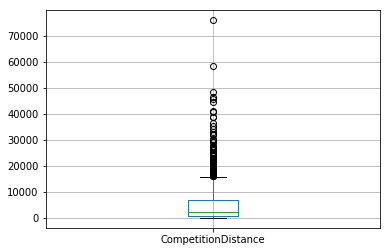

In [31]:
#Drawing BoxPlot to represent outliers
data=store_data[['Store','CompetitionDistance']]
data.boxplot('CompetitionDistance')

In [16]:
# Python Function to remove outliers
def remove_outliers(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<=min_val, col_values>=max_val), np.NaN, col_values)
    return df

In [58]:
#Since the Data is very large, it isn't easy to observe and detect outliers, therefore we have applied the turkey method of detecting the outliers using Inter-Quartile-range(IQR)
#The formulas are:
#Low outliers = Q1 – 1.5(Q3 – Q1) = Q1 – 1.5(IQR)
#High outliers = Q3 + 1.5(Q3 – Q1) = Q3 + 1.5(IQR)
#Where:
#Q1 = first quartile
#Q3 = third quartile
#IQR = Interquartile range
Q1 = combined_train_data['CompetitionDistance'].quantile(0.25)
Q3 = combined_train_data['CompetitionDistance'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR is ")
print (IQR)
max_value= Q3 + 1.5*IQR
print ("Max Value is")
print (max_value)

#Since all the CompetitionDistance Data are positive, there are no "outliers" (by the present definition) on the low side.
#Therfore we can assign the min_value to 0
min_value=200

IQR is 
4260.0
Max Value is
11610.0


In [17]:
combined_train_data = remove_outliers(df = combined_train_data, column = 'CompetitionDistance', min_val = 0, max_val = 24000)
final_size=combined_train_data.shape[0]

c:\users\girish\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.
c:\users\girish\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


In [34]:
print("Preview the data after removal of outliers")
combined_train_data.head(30)

Preview the data after removal of outliers


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,Friday,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,Thursday,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,Wednesday,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,Tuesday,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,Monday,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
6,1,Saturday,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
7,1,Friday,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
8,1,Thursday,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
9,1,Wednesday,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
10,1,Tuesday,2015-07-21,3558,469,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [35]:
print("performing the same removal of outliers for test data")

performing the same removal of outliers for test data


In [52]:
combined_test_data = remove_outliers(df = combined_test_data, column = 'CompetitionDistance', min_val = 0, max_val = 24000)

c:\users\girish\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.
c:\users\girish\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


In [183]:
#Taking the information about stores, Customers and CompetitionDistance 
dfi=combined_train_data[['Store','Customers','CompetitionDistance']]

In [141]:
#dfi=dfi.groupby(['Store','CompetitionDistance'],as_index=False)['Customers'].sum()

In [51]:
data_size_after_outliers= combined_train_data.shape[0]
print(data_size_after_outliers)

844392


In [184]:
#Since the competition distance of the stores are in ungrouped data, we are going to group it, into classes of width 2000.
#And we are going to calculate the number of customers that visit the stores at each of these classes.


l =['0-2000','2000-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-22000','22000-24000']  
b = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000]
dfi = dfi.groupby(pd.cut(dfi['CompetitionDistance'], bins=b, labels=l))['Customers'].sum().fillna(0).reset_index()

In [185]:
dfi.head(23)
#After seeing the results you might be thinking, why are more customers going to the shops which have competition nearby,
#Observationally, one can determine, that more customers are going to the stores which have competitors nearby.
#This data in itself is not sufficient to analyze, the information, because we have not found out how many stores are there which fall into the groups

,CompetitionDistance,Customers
0,0-2000,335696813
1,2000-4000,103454299
2,4000-6000,53514645
3,6000-8000,28506702
4,8000-10000,27548402
5,10000-12000,11615833
6,12000-14000,12208906
7,14000-16000,13485316
8,16000-18000,12538128
9,18000-20000,12158500


In [186]:
#We need information about the number of stores that fall in the various competitionDistance groups
#dfs is the dataframe that stores only the relevant information about the stores, the ones which we are interested in, Store, and CompetitionDistance
dfs=store_data[['Store','CompetitionDistance']]

In [187]:
#Similar to how we had done above, we group the CompetitionDistance in classes of 2000 distances and counting the number of stores that come in each of these distances
l =['0-2000','2000-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-22000','22000-24000']  
b = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000]
dfs = dfs.groupby(pd.cut(dfs['CompetitionDistance'], bins=b, labels=l))['Store'].count().fillna(0).reset_index()

In [222]:
dfs.head(10)

,CompetitionDistance,Store
0,0-2000,502
1,2000-4000,202
2,4000-6000,103
3,6000-8000,60
4,8000-10000,58
5,10000-12000,26
6,12000-14000,27
7,14000-16000,26
8,16000-18000,26
9,18000-20000,25


In [189]:
#Merge the data set that holds the information about the total customers and the number of stores in each distance range, so that we can get both the information in the sane table
df=pd.merge(dfi,dfs,on="CompetitionDistance")

In [190]:
df.head()

,CompetitionDistance,Customers,Store
0,0-2000,335696813,502
1,2000-4000,103454299,202
2,4000-6000,53514645,103
3,6000-8000,28506702,60
4,8000-10000,27548402,58


In [191]:
#The best metric to analyze how CompetitorDistance is affecting the sales is my measuring the average customer per store at each of these classes of distances
df['Customer/Store'] = df['Customers']/df['Store']

In [192]:
df.head(14)

,CompetitionDistance,Customers,Store,Customer/Store
0,0-2000,335696813,502,668718.750996
1,2000-4000,103454299,202,512149.995050
2,4000-6000,53514645,103,519559.660194
3,6000-8000,28506702,60,475111.700000
4,8000-10000,27548402,58,474972.448276
5,10000-12000,11615833,26,446762.807692
6,12000-14000,12208906,27,452181.703704
7,14000-16000,13485316,26,518666.000000
8,16000-18000,12538128,26,482235.692308
9,18000-20000,12158500,25,486340.000000


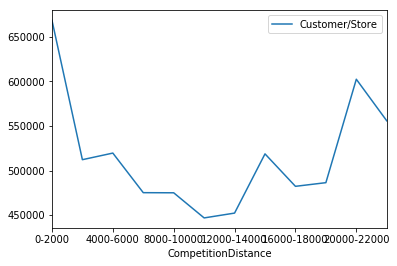

In [193]:
#Plot the information about  Customers/Store 
df.plot(x='CompetitionDistance',y='Customer/Store')

#Does it logically make sense? more customers in the stores which have competition Nearby? No, it doesn't. The explaination for why this might be is below

In [14]:
#There is an attribute 'Promo' in the dataset, which determines if the store is offering a promo or not
#We are trying to analyze if this promo is what is affecting the customers count in the stores having competitions nearby,
dfs1=combined_train_data[['Store','Customers','Promo','Sales','CompetitionDistance']]

In [15]:
#Take only those stores which are offering promos.
dfs1= dfs1[dfs1["Promo"] != 0]

In [16]:
#Classify CompetitionDistance similar to how it was done above.
#Count the number of stores in each class which are offering promo
l =['0-2000','2000-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-22000','22000-24000']  
b = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000]
dfs1 = dfs1.groupby(pd.cut(dfs1['CompetitionDistance'], bins=b, labels=l))['Store'].count().fillna(0).reset_index()

In [19]:
dfs1=dfs1.rename(columns={'Store' : 'NoOfDaysPromosOffered'})

In [20]:
dfs1.head()

,CompetitionDistance,NoOfDaysPromosOffered
0,0-2000,169660
1,2000-4000,68850
2,4000-6000,35038
3,6000-8000,20265
4,8000-10000,19632


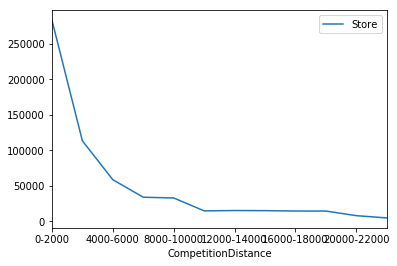

In [220]:
#Plot the information
dfs1.plot(x='CompetitionDistance',y='Store')

In [9]:
#This means that the stores who have competition Nearby, they are aggressively promoting their offers

In [23]:
dfnp = combined_train_data[combined_train_data["Promo"] != 1]

In [24]:
no_of_daysNPromo=dfnp.shape[0]
print(no_of_daysNPromo)

467496


In [25]:
dfp= combined_train_data[combined_train_data["Promo"] != 0]
no_of_daysPromo=dfp.shape[0]
print(no_of_daysPromo)

376896


In [26]:
dfp=dfp.groupby(by=['Store'])['Customers'].sum()

In [27]:
dfnp=dfnp.groupby(by=['Store'])['Customers'].sum()

In [25]:
dfnp.head()

Store
1    232615
2    213522
3    277873
4    545353
5    189204
Name: Customers, dtype: int64

In [27]:
dfp.head()

Store
1    207908
2    244333
3    306437
4    490901
5    229384
Name: Customers, dtype: int64

In [28]:
sum_without_promo=dfnp.sum()

In [29]:
sum_with_promo=dfp.sum()

In [30]:
customersPerDay=sum_with_promo/no_of_daysPromo

In [31]:
print(customersPerDay)

844.434401002


In [32]:
customersPerDay2=sum_without_promo/no_of_daysNPromo

In [33]:
print(customersPerDay2)

696.856886476


In [34]:
ts1=['Promo','NoPromo']
ts2=[customersPerDay,customersPerDay2]
cust=pd.DataFrame(ts2,columns=['CustomersPerDay'])

In [35]:
cust.head()

,CustomersPerDay
0,844.434401
1,696.856886


In [37]:
cust2=pd.DataFrame(ts1,columns=['Offer'])

In [39]:
cust2.head()

,Offer
0,Promo
1,NoPromo


In [41]:
cust['tmp']=1
cust2['tmp']=1

In [50]:
dfc=pd.merge(cust,cust2,on=['tmp'])

In [52]:
dfc.head()

,CustomersPerDay,tmp,Offer
0,844.434401,1,Promo
1,844.434401,1,NoPromo
2,696.856886,1,Promo
3,696.856886,1,NoPromo


In [72]:
dfc=dfc.drop(dfc.index[[1,2]])

In [68]:
dfc=dfc.drop('tmp', axis=1)

ValueError: labels ['tmp'] not contained in axis

In [73]:
dfc.head()

,CustomersPerDay,Offer
0,844.434401,Promo
3,696.856886,NoPromo


In [40]:
dfc.plot(kind='bar', x='Offer')

NameError: name 'dfc' is not defined

In [25]:
dfso= combined_train_data[combined_train_data["Open"] != 0]

In [26]:
dfs1= dfso[dfso["SchoolHoliday"] == 1]
dfs2= dfso[dfso["StateHoliday"]==1]
print(dfs2.shape[0])

0


In [106]:
#dfs2 is null

In [27]:
dfs1=dfs1.groupby(by=['Store'])['Customers'].sum()

In [28]:
Count=dfs1.shape[0]

In [29]:
AvgCustPerStore=dfs1.sum()/Count

In [30]:
#Average customers per Store if store is open on holidays
print(AvgCustPerStore)

114804.147085


In [31]:
dfs3=dfso[dfso['SchoolHoliday']!=1]

In [32]:
dfs3=dfs3.groupby(by=['Store'])['Customers'].sum()

In [33]:
Count2=dfs3.shape[0]

In [34]:
AvgCustPerStore2=dfs3.sum()/Count2

In [35]:
print(AvgCustPerStore2)

462811.776682


In [36]:
ts2=[AvgCustPerStore,AvgCustPerStore2]

In [37]:
cust3=pd.DataFrame(ts2,columns=['CustomersPerStore'])

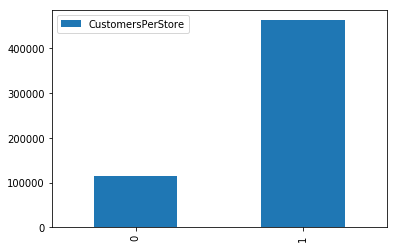

In [38]:
cust3.plot(kind='bar')

In [143]:
#0 Bar represents the AvgCustomersPerStore on SchoolHolidays

In [6]:
#1 Bar represents the AvgCustomerPerStore on Days other than schoolHolidays

In [63]:
#Determining how Assortment affects the Customers.
dfsa=combined_train_data.groupby(by=['Assortment'])['Customers'].sum()
#dfsa is a dataframe that stores the data about each assortment type and the total customers that visit these stores.

In [58]:
dfsa.head()

Assortment
a    332766938
b     16972525
c    294302292
Name: Customers, dtype: int64

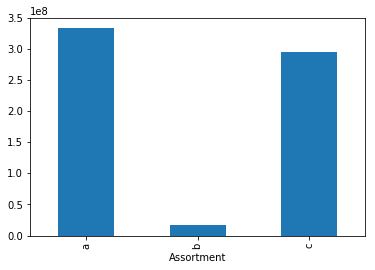

In [60]:
dfsa.plot(kind='bar')

In [65]:
#Determining how StoreType affects the Customers
dfss=combined_train_data.groupby(by=['StoreType'])['Customers'].sum()
#dfss is the dataframe that is holding the information about the total customers that visit each store type.

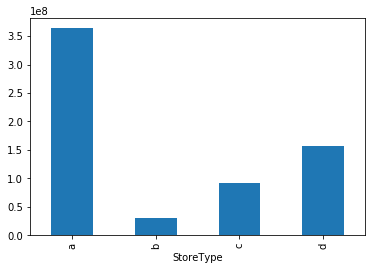

In [67]:
dfss.plot(kind='bar')

In [71]:
#Determining how DayOfTheWeek Affects the totalCustomers
dfsd=combined_train_data.groupby(by=['DayOfWeek'])['Customers'].sum()
#dfsd is the dataframe that holds the infromation about the Total customers that visit the store each day

In [72]:
dfsd.head(7)

DayOfWeek
1    117675012
2    110848063
3    105117642
4    101732938
5    108384820
6     95103854
7      5179426
Name: Customers, dtype: int64

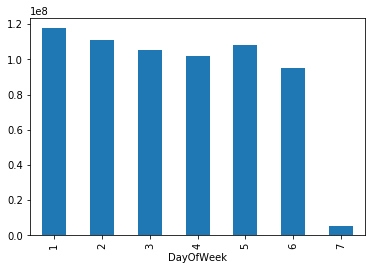

In [73]:
dfsd.plot(kind='bar')

In [75]:
#Determining how DayOfTheWeek Affects the total sales
dfsd=combined_train_data.groupby(by=['DayOfWeek'])['Sales'].sum()
#dfsd is the dataframe that holds the infromation about the Total customers that visit the store each day

In [78]:
dfsd.head(7)

DayOfWeek
1    1130203012
2    1020411930
3     954962863
4     911177709
5     980555941
6     846317735
7      29551433
Name: Sales, dtype: int64

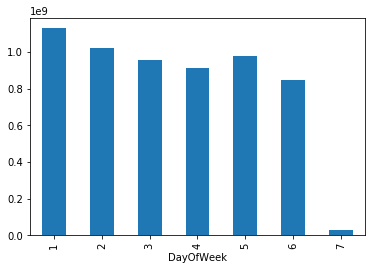

In [79]:
dfsd.plot(kind='bar')